## Merging schedule.csv, merged_master_app.csv, and tbl_schedule.csv

Merging all four files together. Please note that master_app already took care of master and application files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 5)

In [2]:
path = '/data/Dropbox/Data/Asylum_Courts/raw'

In [3]:
master_app = pd.read_csv('../merged_any_master_app.csv')

In [4]:
master_app.head(5)

,idncase,idnproceeding,idnProceedingAppln,numAppsPerProc,dec,nat,case_type,c_asy_type,base_city_code,hearing_loc_code,osc_date,comp_date,attorney_flag,tracid,numProcPerCase
0,2046931.0,3200059.0,803710,4.0,DENY,CH,RMV,def,CHI,CHD,2003-09-09,2004-02-20,1.0,32.0,1
1,2046932.0,3371117.0,2819106,3.0,DENY,CH,RMV,def,NYC,NYC,2003-09-09,2005-05-13,1.0,148.0,1
2,2046933.0,3200063.0,3390354,3.0,DENY,CH,RMV,def,CLE,CEL,2003-09-16,2007-08-15,1.0,3.0,1
3,2046934.0,3200066.0,1643808,2.0,GRANT,CM,RMV,def,CHI,CHD,2003-09-24,2004-01-06,1.0,31.0,1
4,2046935.0,3200067.0,1681269,2.0,DENY,CH,AOC,def,CHI,CHD,2003-09-08,2004-01-30,1.0,32.0,1


In [5]:
master_app.count()

idncase               549235
idnproceeding         549235
idnProceedingAppln    549235
numAppsPerProc        549235
dec                   549235
nat                   549235
case_type             549235
c_asy_type            549235
base_city_code        549235
hearing_loc_code      549235
osc_date              549235
comp_date             549235
attorney_flag         549235
tracid                549235
numProcPerCase        549235
dtype: int64

In [6]:
# renaming variables 
#master_app = master_app.rename(columns={"idncase_x":"idncase", "Appl_Recd_Date":"appl_recd_date", "Appl_Dec":"appl_dec"})

In [7]:
master_app = master_app.drop('idnProceedingAppln', axis=1)

In [8]:
# dropping columns I don't need here

master_app.head(5)

,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,base_city_code,hearing_loc_code,osc_date,comp_date,attorney_flag,tracid,numProcPerCase
0,2046931.0,3200059.0,4.0,DENY,CH,RMV,def,CHI,CHD,2003-09-09,2004-02-20,1.0,32.0,1
1,2046932.0,3371117.0,3.0,DENY,CH,RMV,def,NYC,NYC,2003-09-09,2005-05-13,1.0,148.0,1
2,2046933.0,3200063.0,3.0,DENY,CH,RMV,def,CLE,CEL,2003-09-16,2007-08-15,1.0,3.0,1
3,2046934.0,3200066.0,2.0,GRANT,CM,RMV,def,CHI,CHD,2003-09-24,2004-01-06,1.0,31.0,1
4,2046935.0,3200067.0,2.0,DENY,CH,AOC,def,CHI,CHD,2003-09-08,2004-01-30,1.0,32.0,1


In [9]:
#sched = pd.read_csv(path + '/schedule.csv', low_memory=False)

In [10]:
#sched.head(5)

In [11]:
#sched.count()

In [12]:
#sched['adj_date'] = sched['adj_date'].astype('str')
# delete dates invalid formats
#sched = sched[sched['adj_date'].apply(lambda x: len(x) == 9)] 
#sched['adj_date'] = pd.to_datetime(sched['adj_date'], format='%d%b%Y')

In [13]:
tbl_sched = pd.read_csv('../detailed_schedule.csv', low_memory=False)

In [14]:
tbl_sched.head(5)

,idnschedule,idnproceeding,idncase,osc_date,adj_date,adj_rsn,attorney_present,lang_hearing,hearing_city,hearing_state,base_city,base_state,sched_type,notice_desc,trac_id,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc
0,17035561,961394.0,2706979,1995-06-30 00:00:00,1996-11-27 00:00:00,01,YES,CAPE VERDIAN,BOSTON,MA,BOSTON,MA,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,19.0,1996-11-27 13:00:00,1996-11-27 14:30:00,90.0,ALIEN TO SEEK REPRESENTATION
1,17035562,961398.0,2706991,1991-01-18 00:00:00,1991-05-21 00:00:00,14,NO,ENGLISH,BOSTON,MA,BOSTON,MA,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,19.0,1991-05-21 08:30:00,1991-05-21 09:00:00,30.0,OTHER OPERATIONAL/SECURITY FACTORS
2,17035563,961402.0,2707014,1995-05-17 00:00:00,1997-04-02 00:00:00,NaN,YES,ENGLISH,BOSTON,MA,BOSTON,MA,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,226.0,1997-04-02 13:00:00,1997-04-02 16:30:00,210.0,UNKNOWN
3,17035564,961405.0,2707014,1995-05-17 00:00:00,1996-04-16 00:00:00,NaN,YES,UNKNOWN LANGUAGE,BOSTON,MA,BOSTON,MA,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,20.0,1996-04-16 09:00:00,1996-04-16 10:30:00,90.0,UNKNOWN
4,17035565,961406.0,2707020,1996-03-12 00:00:00,2003-01-08 00:00:00,04,YES,ENGLISH,BOSTON,MA,BOSTON,MA,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,18.0,2003-01-08 13:00:00,2003-01-08 16:00:00,180.0,DHS OR DHS ADMIN FILE UNAVAILABLE FOR HEARING


In [15]:
tbl_sched['adj_date'] = pd.to_datetime(tbl_sched['adj_date'])

In [16]:
tbl_sched.count()

idnschedule         6725795
idnproceeding       6725795
idncase             6725795
osc_date            6725303
adj_date            6725795
adj_rsn             6020723
attorney_present    6725795
lang_hearing        6725795
hearing_city        6725795
hearing_state       6725795
base_city           6725795
base_state          6725795
sched_type          6725795
notice_desc         6725795
trac_id             6725795
adj_time_start2     6725795
adj_time_stop2      6725795
durationHearing     6725795
adj_rsn_desc        6725795
dtype: int64

In [17]:
# merging master_app.csv with schedule.csv
#merged_sched_master = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'])
#merged_sched_master.count()

In [18]:
# doing a left join-- this shows ~1000 applications didn't have hearings 
#test = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'], how='left')
#test.count()

In [19]:
# checking merged dataframe
#merged_sched_master.head(5)

In [20]:
# merging with tbl_schedule.csv
merged_sched_master = pd.merge(master_app, tbl_sched, on=['idncase', 'idnproceeding'])
merged_sched_master.count()

idncase             926386
idnproceeding       926386
numAppsPerProc      926386
dec                 926386
nat                 926386
case_type           926386
c_asy_type          926386
base_city_code      926386
hearing_loc_code    926386
osc_date_x          926386
comp_date           926386
attorney_flag       926386
tracid              926386
numProcPerCase      926386
idnschedule         926386
osc_date_y          926386
adj_date            926386
adj_rsn             810843
attorney_present    926386
lang_hearing        926386
hearing_city        926386
hearing_state       926386
base_city           926386
base_state          926386
sched_type          926386
notice_desc         926386
trac_id             926386
adj_time_start2     926386
adj_time_stop2      926386
durationHearing     926386
adj_rsn_desc        926386
dtype: int64

In [21]:
merged_sched_master = merged_sched_master.drop(columns=['base_city_code', 'hearing_loc_code', 'osc_date_x', 'attorney_flag', 'adj_rsn'], axis=1)

In [22]:
merged_sched_master[merged_sched_master.trac_id != merged_sched_master.trac_id]

,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,comp_date,tracid,numProcPerCase,...,hearing_state,base_city,base_state,sched_type,notice_desc,trac_id,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc


In [23]:
merged_sched_master = merged_sched_master.drop(columns=['tracid'], axis=1)

In [24]:
merged_sched_master.count()

idncase             926386
idnproceeding       926386
numAppsPerProc      926386
dec                 926386
nat                 926386
case_type           926386
c_asy_type          926386
comp_date           926386
numProcPerCase      926386
idnschedule         926386
osc_date_y          926386
adj_date            926386
attorney_present    926386
lang_hearing        926386
hearing_city        926386
hearing_state       926386
base_city           926386
base_state          926386
sched_type          926386
notice_desc         926386
trac_id             926386
adj_time_start2     926386
adj_time_stop2      926386
durationHearing     926386
adj_rsn_desc        926386
dtype: int64

## Generating number of "hearings per proceeding" feature

In [25]:
merged_sched_master['numHearingsPerProc'] = 1
# adding additional feature based on how many hearings have been scheduled for the same (idnCase, idnProceeding) pair
merged_sched_master['numHearingsPerProc'] = merged_sched_master.groupby(['idncase', 'idnproceeding'])['numHearingsPerProc'].transform('count')

In [26]:
merged_sched_master.head(5)

,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,comp_date,numProcPerCase,idnschedule,...,base_city,base_state,sched_type,notice_desc,trac_id,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc
0,2.0469e+06,3200059.0,4.0,DENY,CH,RMV,def,2004-02-20,1,17521392,...,CHICAGO,IL,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,32.0,2004-02-20 09:00:00,2004-02-20 12:00:00,180.0,UNKNOWN,5
1,2.0469e+06,3200059.0,4.0,DENY,CH,RMV,def,2004-02-20,1,17538117,...,CHICAGO,IL,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,32.0,2003-11-17 10:00:00,2003-11-17 11:00:00,60.0,ALIEN TO SEEK REPRESENTATION,5
2,2.0469e+06,3200059.0,4.0,DENY,CH,RMV,def,2004-02-20,1,17545649,...,CHICAGO,IL,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,32.0,2003-12-01 10:00:00,2003-12-01 11:00:00,60.0,INSUFFICIENT TIME TO COMPLETE HEARING,5
3,2.0469e+06,3200059.0,4.0,DENY,CH,RMV,def,2004-02-20,1,17553181,...,CHICAGO,IL,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,32.0,2003-12-22 10:00:00,2003-12-22 11:00:00,60.0,ALIEN TO SEEK REPRESENTATION,5
4,2.0469e+06,3200059.0,4.0,DENY,CH,RMV,def,2004-02-20,1,17560602,...,CHICAGO,IL,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,32.0,2004-01-05 10:00:00,2004-01-05 11:00:00,60.0,UNPLANNED IJ LEAVE - DETAIL/OTHER ASSIGNMENT,5


## Generationg "number of days between first and last hearing" feature

In [27]:
merged_sched_master = merged_sched_master.sort_values(['idnproceeding','adj_date']).reset_index()

In [28]:
merged_sched_master["durationFirstLastHearing"]= merged_sched_master.groupby(['idncase', 'idnproceeding'])['adj_date'].transform(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

In [29]:
# this shows that many proceedings spanned an unreasonable amount of time (in days)
merged_sched_master.sort_values(['durationFirstLastHearing', 'idnproceeding', 'adj_date'], ascending=False).head(20)

,index,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,comp_date,numProcPerCase,...,base_state,sched_type,notice_desc,trac_id,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing
657502,697279,5.9971e+06,4542605.0,1.0,DENY,ES,DEP,def,1985-07-09,1,...,AZ,Initial Master,UNKNOWN,177.0,2008-08-19 08:30:00,2008-08-19 12:30:00,240.0,OTHER OPERATIONAL/SECURITY FACTORS,6,8764
657501,697284,5.9971e+06,4542605.0,1.0,DENY,ES,DEP,def,1985-07-09,1,...,AZ,Individual,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,177.0,1985-07-09 13:00:00,1985-07-09 14:00:00,60.0,IJ Completion prior to hearing,6,8764
657500,697283,5.9971e+06,4542605.0,1.0,DENY,ES,DEP,def,1985-07-09,1,...,AZ,Master Reset,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,177.0,1985-03-04 13:00:00,1985-03-04 13:30:00,30.0,MC TO IC--MERITS HEARING,6,8764
657499,697282,5.9971e+06,4542605.0,1.0,DENY,ES,DEP,def,1985-07-09,1,...,AZ,Individual,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,177.0,1984-10-16 16:00:00,1984-10-16 16:30:00,30.0,MC TO IC--MERITS HEARING,6,8764
657498,697281,5.9971e+06,4542605.0,1.0,DENY,ES,DEP,def,1985-07-09,1,...,AZ,Master Reset,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,177.0,1984-09-11 13:00:00,1984-09-11 13:30:00,30.0,ALIEN TO SEEK REPRESENTATION,6,8764
657497,697280,5.9971e+06,4542605.0,1.0,DENY,ES,DEP,def,1985-07-09,1,...,AZ,Initial Master,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,177.0,1984-08-21 09:00:00,1984-08-21 09:30:00,30.0,ALIEN TO SEEK REPRESENTATION,6,8764
481309,536769,5.5654e+06,3996413.0,3.0,DENY,ES,RMV,aff,2010-11-04,1,...,VA,Individual Asylum,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,3.0,2010-11-04 14:00:00,2010-11-04 17:00:00,180.0,IJ Completion prior to hearing,18,8403
481308,536768,5.5654e+06,3996413.0,3.0,DENY,ES,RMV,aff,2010-11-04,1,...,VA,Individual Asylum,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,3.0,2009-10-23 10:30:00,2009-10-23 12:00:00,90.0,DHS OR DHS ADMIN FILE UNAVAILABLE FOR HEARING,18,8403
481307,536767,5.5654e+06,3996413.0,3.0,DENY,ES,RMV,aff,2010-11-04,1,...,VA,Master Reset,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,3.0,2008-11-12 10:00:00,2008-11-12 10:30:00,30.0,DHS INVESTIGATION,18,8403
481306,536766,5.5654e+06,3996413.0,3.0,DENY,ES,RMV,aff,2010-11-04,1,...,VA,Master Reset,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,3.0,2008-09-24 10:00:00,2008-09-24 10:30:00,30.0,ALIEN OR REP. REJECTED EARLIEST POSSIBLE HEARING,18,8403


## Generating "average hearing duration" feature

In [30]:
merged_sched_master['averageHearingDur']= merged_sched_master.groupby(['idncase', 'idnproceeding'])['durationHearing'].transform('mean')

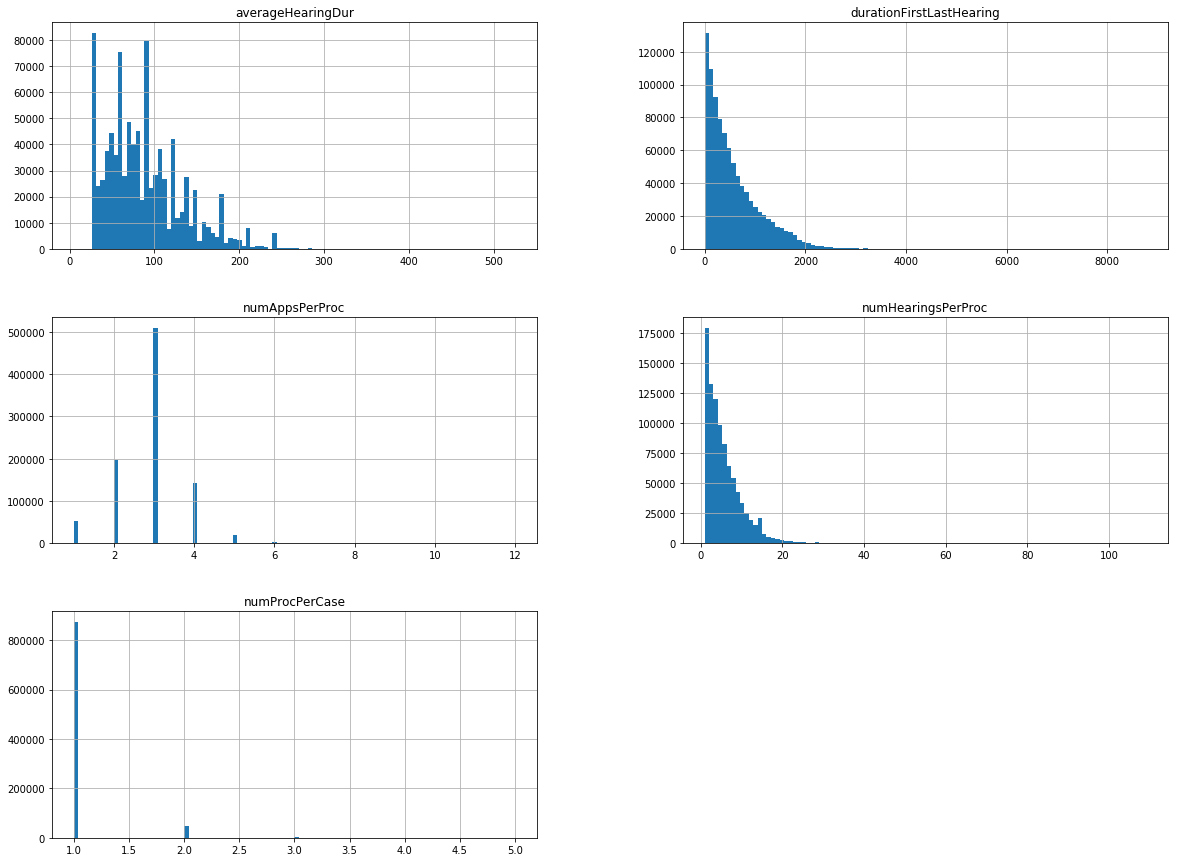

In [31]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'numProcPerCase', 'durationFirstLastHearing', 'averageHearingDur'], figsize=(20, 15))
plt.show()

## Selecting the last hearing for each idncase

In [32]:
merged_sched_master = merged_sched_master.groupby(['idncase', 'idnproceeding'], as_index=False).last()

In [33]:
merged_sched_master.count()

idncase                     258735
idnproceeding               258735
index                       258735
numAppsPerProc              258735
dec                         258735
nat                         258735
case_type                   258735
c_asy_type                  258735
comp_date                   258735
numProcPerCase              258735
idnschedule                 258735
osc_date_y                  258735
adj_date                    258735
attorney_present            258735
lang_hearing                258735
hearing_city                258735
hearing_state               258735
base_city                   258735
base_state                  258735
sched_type                  258735
notice_desc                 258735
trac_id                     258735
adj_time_start2             258735
adj_time_stop2              258735
durationHearing             258735
adj_rsn_desc                258735
numHearingsPerProc          258735
durationFirstLastHearing    258735
averageHearingDur   

In [34]:
merged_sched_master = merged_sched_master.drop(columns=['index', 'idnschedule'], axis=1)

In [35]:
merged_sched_master.to_csv('../merged_any_master_schedule.csv', index=False)

## Histogram of numerical features

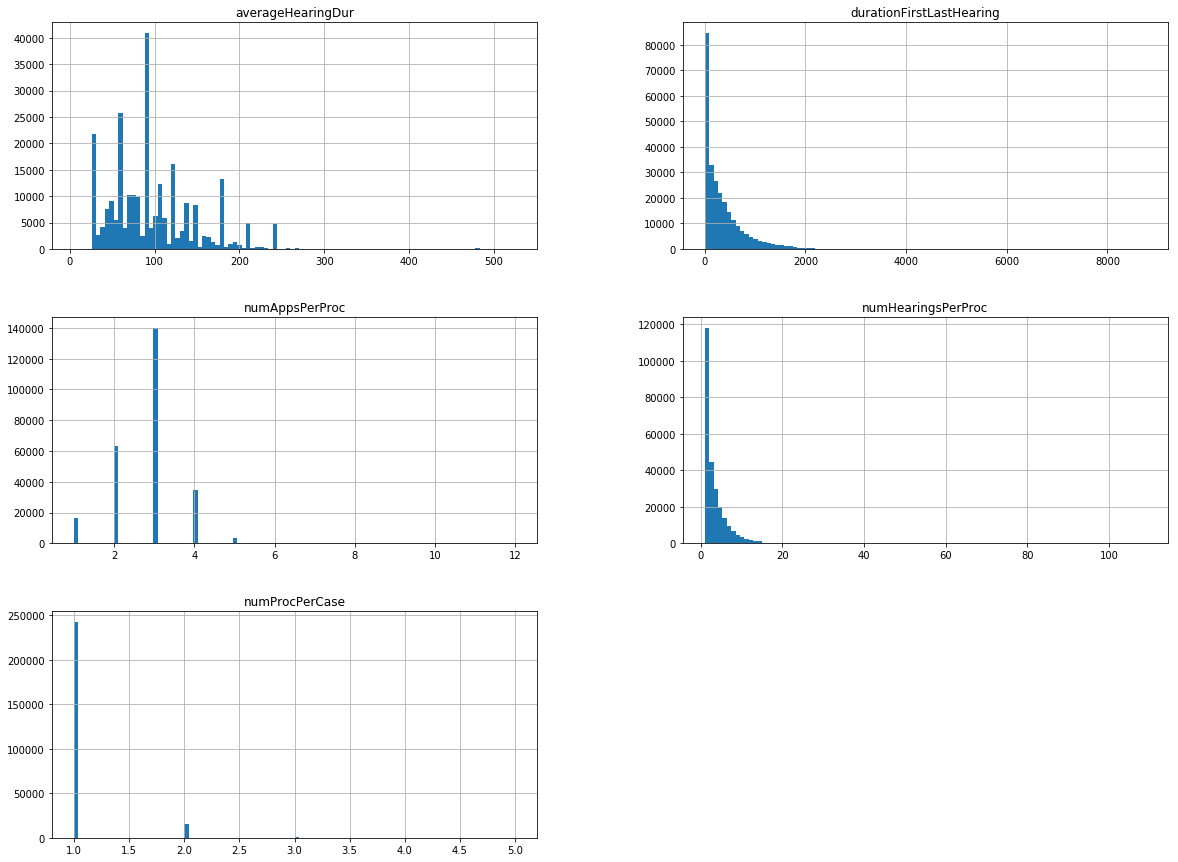

In [37]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'numProcPerCase', 'durationFirstLastHearing', 'averageHearingDur'], figsize=(20, 15))
plt.show()

## Average hearing duration v.s. grant rate

In [ ]:
avgHDur_grantR = merged_sched_master[merged_sched_master.averageHearingDur <= 500]

In [ ]:
avgHDur_grantR['rangeInc100'] = pd.cut(avgHDur_grantR['averageHearingDur'], np.arange(0, 500, 50))

In [ ]:
avgHDur_grantR = avgHDur_grantR.groupby(['rangeInc100', 'dec'])['dec'].count()

In [ ]:
avgHDur_grantR  = avgHDur_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
avgHDur_grantR.unstack().reset_index().plot(x='rangeInc100', y='GRANT', kind='bar', title='Average Hearing Duation v.s. Grant Rate')

## Number of applications/proceeding v.s grant rate

In [ ]:
numApp_grantRate = merged_sched_master.groupby(['numAppsPerProc', 'dec'])['dec'].count()

In [ ]:
numApp_grantRate = numApp_grantRate.groupby(level=0).apply(lambda x: x / x.sum())
numApp_grantRate

In [ ]:
numApp_grantRate.unstack().reset_index().plot(x='numAppsPerProc', y='GRANT', kind='bar', title='Number of Applications/Proc v.s. Grant Rate')

## Number of days elapsed between first and last hearing v.s grant rate

In [ ]:
# getting rid of the rows where days elapsed is greater than 2000
durationFirstLastHearing_grantR = merged_sched_master[merged_sched_master.durationFirstLastHearing < 2000]

In [ ]:
# binning days elapsed into incremental periods of 3 months 
durationFirstLastHearing_grantR['rangeInc90'] = pd.cut(durationFirstLastHearing_grantR['durationFirstLastHearing'], np.arange(0, 2000, 90))

In [ ]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(['rangeInc90', 'dec'])['dec'].count()

In [ ]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
durationFirstLastHearing_grantR

In [ ]:
durationFirstLastHearing_grantR.unstack().reset_index().plot(x='rangeInc90', y='GRANT', kind='bar', title='Number of Days Elapsed Between First and Last Hearing v.s. Grant Rate')

## Number of hearings/proceeding v.s. grant rate

In [ ]:
# getting rid of rows where there are more than 20 hearings 
numHearing_grantR = merged_sched_master[merged_sched_master.numHearingsPerProc < 20]

In [ ]:
numHearing_grantR = numHearing_grantR.groupby(['numHearingsPerProc', 'dec'])['dec'].count()

In [ ]:
numHearing_grantR = numHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
numHearing_grantR.unstack().reset_index().plot(x='numHearingsPerProc', y='GRANT', kind='bar', title='Number of Hearings/Proceeding v.s. Grant Rate')

## Political affiliation of president at the time of hearing v.s. grant rate

In [ ]:
pres = {1985:'REP', 1986:'REP', 1987:'REP', 1988:'REP', 1989:'REP', 1990:'REP', 1991:'REP', 1992:'REP', 1993:'DEM', 1994:'DEM', 1995:'DEM', 1996:'DEM', 1997:'DEM', 1998:'DEM', 1999:'DEM', 2000:'DEM', 2001:'REP', 2002:'REP', 2003:'REP', 2004:'REP', 2005:'REP', 2006:'REP', 2007:'REP', 2008:'REP', 2009:'DEM', 2010:'DEM', 2011:'DEM', 2012:'DEM', 2013:'DEM', 2014:'DEM'}

In [ ]:
merged_sched_master['pres_aff'] = merged_sched_master['adj_date'].dt.year.map(pres)

In [ ]:
pres_grantR = merged_sched_master.groupby(['pres_aff', 'dec'])['dec'].count()

In [ ]:
pres_grantR = pres_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
pres_grantR

In [ ]:
pres_grantR.unstack().reset_index().plot(x='pres_aff', y='GRANT', kind='bar', title='President Affiliation At Hearing v.s. Grant Rate')